In [88]:
import pandas as pd
import pickle
from collections import Counter

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix





In [89]:

pd.set_option('display.max_rows', 300)

survey = pd.read_csv('/Users/williamyee/Documents/Data Bootcamp/Classification-Project-DSjobs/Data/kaggle-survey-2017/multi_r_.csv', encoding = 'ISO-8859-1')

list(survey.columns)

survey.JobSatisfaction.value_counts()



survey.head()

survey.EmploymentStatus.unique()

survey.groupby('EmploymentStatus').count()

survey.UniversityImportance.value_counts()

survey.JobSatisfaction.value_counts()



/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning:

Columns (32,84,87,88,100,110,117,124,125,128,130,131,165) have mixed types. Specify dtype option on import or set low_memory=False.



7                          1448
8                          1427
6                           765
9                           677
5                           627
10 - Highly Satisfied       589
3                           358
4                           354
1 - Highly Dissatisfied     167
I prefer not to share       148
2                           117
Name: JobSatisfaction, dtype: int64

In [90]:
conditions = [  survey.JobSatisfaction.isin(['7','8','9','10 - Highly Satisfied']),
                survey.JobSatisfaction.isin(['1 - Highly Dissatisfied','2','3','4','5','6','I prefer not to share'])
             ]
choices = [1,0]
survey['JobSatisfaction'] = np.select(conditions, choices, default=survey.JobSatisfaction)


survey = survey[survey.JobSatisfaction.notna()]


In [91]:
survey.shape

(6677, 229)

In [92]:
percent_missing = survey.isnull().sum()*100/len(survey)
missing_value_df = pd.DataFrame({'columnname':survey.columns, 'percent_missing':percent_missing})
#missing_value_df

In [93]:
percent_missing = survey.isnull().sum()*100/len(survey)
missing_value_df = pd.DataFrame({'columnname':survey.columns, 'percent_missing':percent_missing})
seventy_five_data = missing_value_df[missing_value_df.percent_missing<40]

seventy_five_data

survey_minimal_missing= survey[list(seventy_five_data.columnname)]

survey_minimal_missing.reset_index(inplace=True)
X = survey_minimal_missing.drop(columns = 'JobSatisfaction',axis =1)
y = survey_minimal_missing['JobSatisfaction']
# X

In [94]:
Counter(y)

Counter({0: 2536, 1: 4141})

In [95]:
X_cat = X.select_dtypes(include='object')
X_cat = pd.DataFrame(X_cat,dtype ='str')
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_cat_imputed = imp_freq.fit_transform(X_cat)
X_cat_imputed = pd.DataFrame(data = X_cat_imputed, columns = X_cat.columns)

from collections import defaultdict
d = defaultdict(LabelEncoder)
fit = X_cat_imputed.apply(lambda x: d[x.name].fit_transform(x))
#fit

In [96]:
X_num = X.select_dtypes(include='float64')
imp_freq = SimpleImputer(missing_values=np.nan, strategy='median')
X_num_imputed = imp_freq.fit_transform(X_num)
X_num_imputed = pd.DataFrame(data= X_num_imputed, columns = X_num.columns)

scale = StandardScaler()
X_num_imputed = scale.fit_transform(X_num_imputed)
X_num_imputed = pd.DataFrame(data= X_num_imputed, columns = X_num.columns)



In [97]:
# for i in range(X_cat_imputed.shape[1]):
#     print(X_cat.iloc[:,i].value_counts())


In [98]:
X_imputed = pd.concat([fit,X_num_imputed],axis =1)
colnames = X_imputed.columns

In [99]:
y =pd.Series(y, dtype ='int')

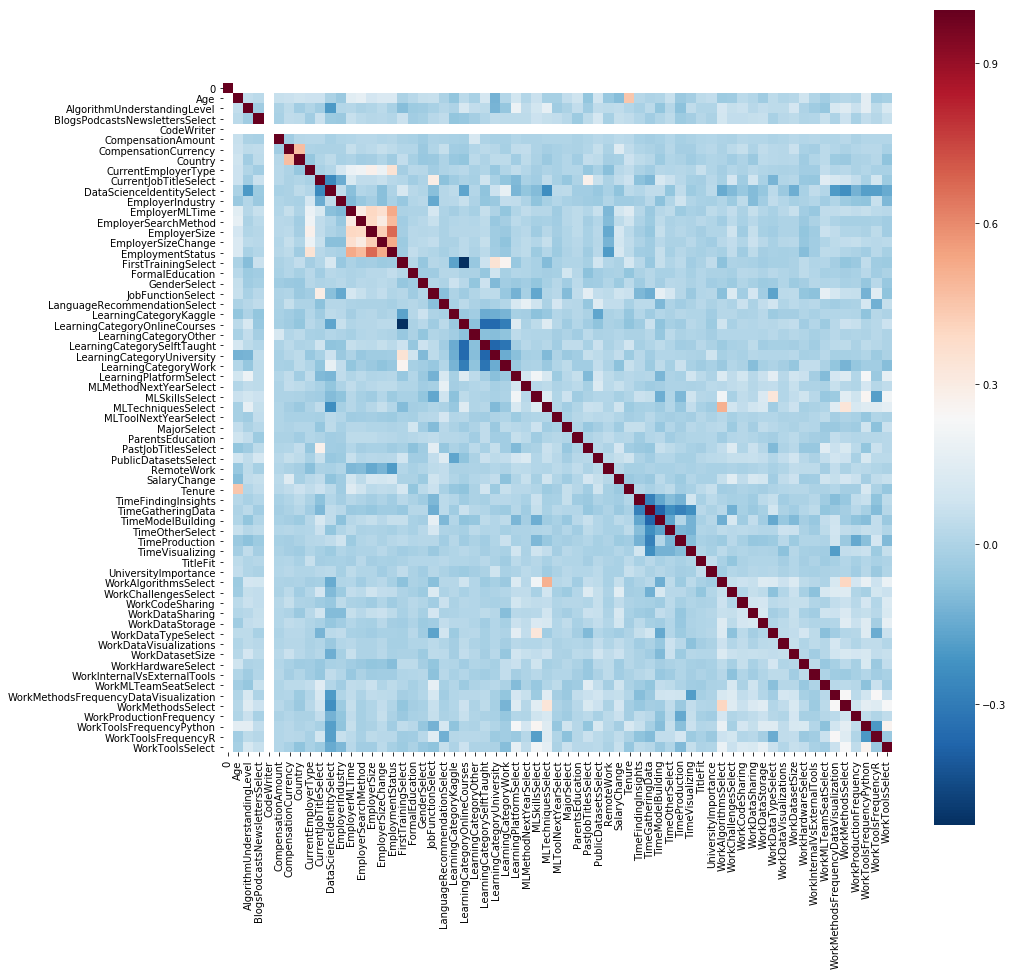

In [100]:
model_data = pd.concat([X_imputed,y])
corrs = model_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
fig = sns.heatmap(corrs, square=True, cmap="RdBu_r");



In [101]:
Counter(y)

Counter({0: 2536, 1: 4141})

In [102]:
corrs

,0,Age,AlgorithmUnderstandingLevel,BlogsPodcastsNewslettersSelect,CodeWriter,CompensationAmount,CompensationCurrency,Country,CurrentEmployerType,CurrentJobTitleSelect,...,WorkDatasetSize,WorkHardwareSelect,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkMethodsFrequencyDataVisualization,WorkMethodsSelect,WorkProductionFrequency,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsSelect
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,0.049961,0.033145,NaN,0.062194,0.068965,0.080789,0.072018,0.071200,...,0.017164,0.079580,0.005403,-0.028179,0.009505,0.018075,0.009160,0.154138,-0.028301,-0.019270
AlgorithmUnderstandingLevel,NaN,0.049961,1.000000,-0.031985,NaN,-0.007170,0.034754,-0.029599,0.005236,-0.031270,...,0.098760,0.000933,-0.031841,-0.057967,0.107461,0.135502,0.065204,0.154801,0.036903,0.109474
BlogsPodcastsNewslettersSelect,NaN,0.033145,-0.031985,1.000000,NaN,-0.013530,0.044467,0.036753,-0.025615,0.064993,...,0.038000,0.007956,0.012199,0.062772,0.001509,0.070549,-0.008249,0.051041,0.018678,0.061903
CodeWriter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CompensationAmount,NaN,0.062194,-0.007170,-0.013530,NaN,1.000000,-0.027982,0.017507,0.023870,0.026049,...,0.024405,0.015861,0.021585,0.005127,0.007355,0.022362,-0.006394,0.015018,0.012688,0.013820
CompensationCurrency,NaN,0.068965,0.034754,0.044467,NaN,-0.027982,1.000000,0.473103,0.000869,-0.003596,...,0.066077,-0.012076,-0.021357,0.030321,0.015653,-0.002786,0.011817,0.027103,0.022521,-0.011600
Country,NaN,0.080789,-0.029599,0.036753,NaN,0.017507,0.473103,1.000000,-0.059859,0.004897,...,0.023336,-0.033486,0.007211,0.029395,-0.038158,-0.044939,-0.005885,-0.000975,0.018959,-0.071571
CurrentEmployerType,NaN,0.072018,0.005236,-0.025615,NaN,0.023870,0.000869,-0.059859,1.000000,-0.009284,...,-0.000826,-0.026782,-0.029935,0.051852,0.011953,0.023351,-0.002329,0.015781,-0.009921,-0.011421
CurrentJobTitleSelect,NaN,0.071200,-0.031270,0.064993,NaN,0.026049,-0.003596,0.004897,-0.009284,1.000000,...,0.021472,-0.049704,-0.056338,0.142970,0.105845,0.087666,0.047037,-0.009824,0.090796,-0.043046


In [103]:
# X_imputed.sample(20)

In [104]:
X, X_test, y, y_test = train_test_split(X_imputed, y, test_size=.2, random_state=100)
X, X_val, y, y_val = train_test_split(X, y, test_size=.25, random_state=100)



In [105]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


# ros = RandomOverSampler
# X_train, y_train = ros.fit_sample(X,y)


smot = SMOTE()
X_train, y_train = smot.fit_sample(X,y)

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [107]:
gbm.score(X_test,y_test)

0.69311377245508987

In [108]:
Counter((gbm.predict(X_test)))

Counter({1: 947, 0: 389})

In [109]:
pd.DataFrame(zip(list(gbm.feature_importances_),colnames)).sort_values(by = 0, ascending= False)

,0,1
13,0.127850,DataScienceIdentitySelect
49,0.121844,SalaryChange
40,0.087533,WorkChallengesSelect
5,0.063289,TitleFit
31,0.054241,WorkProductionFrequency
38,0.041074,WorkMethodsFrequencyDataVisualization
42,0.035948,WorkInternalVsExternalTools
48,0.034080,CompensationCurrency
27,0.033842,UniversityImportance
47,0.028560,RemoteWork


In [110]:
# parameter_grid={
#     "loss":["deviance"],
#     "learning_rate": [0.05, 0.075, 0.1],
#     'min_samples_leaf': [1, 2],
#     'min_samples_split': [2, 3],
#     "max_depth":[40,50],
#     "max_features":["sqrt"],
#     "criterion": ["friedman_mse"],
#     "subsample":[ 1.0],
#     "n_estimators":[125]
#     }
# clf = GridSearchCV(GradientBoostingClassifier(), parameter_grid, cv=5, n_jobs=-1,scoring = 'roc_auc', verbose= True)

# clf.fit(X_train, y_train)



In [111]:
# pickle.dump(clf,open('gbmCV.p','wb'))

In [112]:
clf = pickle.load(open('gbmCV.p','rb'))

In [113]:
clf.best_score_

0.90600239879519162

In [114]:
clf.best_params_


{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 125,
 'subsample': 1.0}

In [115]:
confusion_matrix(y_test,clf.predict(X_test))

array([[153, 372],
       [ 85, 726]])

In [116]:
Counter(clf.predict(X_test))

Counter({1: 1098, 0: 238})

In [117]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

# Run CV with 5 folds (Random Forest)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [6, 15,20, 30,40],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [200, 400]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=10, n_jobs=-1, scoring ='roc_auc')
rf_grid.fit(X_train, y_train)

In [118]:
# rf_grid.best_score_

In [119]:
# pickle.dump(rf_grid,open('rfCV.p','wb'))

In [120]:
# rf_grid = pickle.load(open('rfCV.p','rb'))

In [121]:
# confusion_matrix(y_test,rf_grid.predict(X_test))

In [122]:
# rf_grid.cv_results_

In [123]:
# rf_grid.best_params_

In [124]:
#build random forest
rf_final = RandomForestClassifier(bootstrap= True, max_depth= 40, max_features= 'sqrt', 
                                  min_samples_leaf=1,min_samples_split= 3, n_estimators= 400)

In [125]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
pd.DataFrame(zip(list(rf_final.feature_importances_),colnames)).sort_values(by = 0, ascending= False)

,0,1
40,0.044952,WorkChallengesSelect
49,0.027869,SalaryChange
13,0.026554,DataScienceIdentitySelect
31,0.026198,WorkProductionFrequency
11,0.023596,LearningPlatformSelect
37,0.022561,WorkMethodsSelect
34,0.022555,WorkToolsSelect
1,0.022191,Country
17,0.020409,PastJobTitlesSelect
63,0.020309,CompensationAmount


In [127]:
gb_final = GradientBoostingClassifier(
    criterion= 'friedman_mse', learning_rate=0.05, loss='deviance', max_depth =40, max_features = 'sqrt', 
    min_samples_leaf=2, min_samples_split=3, n_estimators=125, subsample =1)
gb_final.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=40,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=125,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [128]:
pd.DataFrame(zip(list(gb_final.feature_importances_),colnames)).sort_values(by = 0, ascending= False)

,0,1
40,0.048587,WorkChallengesSelect
31,0.029456,WorkProductionFrequency
13,0.029288,DataScienceIdentitySelect
49,0.028808,SalaryChange
11,0.025231,LearningPlatformSelect
1,0.023936,Country
34,0.023465,WorkToolsSelect
37,0.023293,WorkMethodsSelect
42,0.020891,WorkInternalVsExternalTools
17,0.020823,PastJobTitlesSelect


In [129]:
pickle.dump(rf_final,open('rf_final.p','wb'))

pickle.dump(gb_final,open('gb_final.p','wb'))

pickle.dump(y_test,open('y_test_rf_gb.p','wb'))

pickle.dump(X_test,open('X_test_rf_gb.p','wb'))

pickle.dump(y_val,open('y_val_rf_gb.p','wb'))

pickle.dump(X_val,open('X_val_rf_gb.p','wb'))

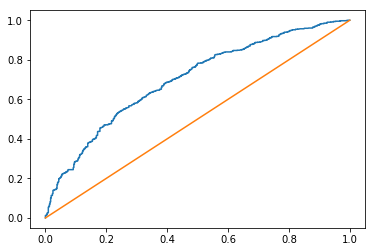

In [130]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test,rf_final.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))

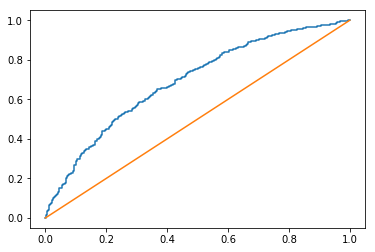

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test,gb_final.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))